___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from ipywidgets import interact
import warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [102]:
from google.colab import files

In [103]:
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (3).csv


In [104]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [105]:
df.rename(columns={'Annual Income (k$)': 'Annual_Income','Spending Score (1-100)': 'Spending_Score'},inplace=True)

In [106]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [107]:
df.shape

(200, 5)

In [108]:
df.duplicated().sum()

0

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [110]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual_Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending_Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [111]:
df.describe(include="object").T

,count,unique,top,freq
Gender,200,2,Female,112


In [112]:
df.drop(columns="CustomerID", inplace=True)

In [113]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [114]:
def plot(col, chart):
    colors = np.random.choice(['blue', 'red', 'green'])

    if chart == "countplot":
        plt.figure(figsize=(20, 5))
        ax = sns.countplot(x=col, data=df)
        plt.title(col + ' Countplot')
        plt.xlabel(col)
        ax.bar_label(ax.containers[0])

    else:
        plt.figure(figsize=(20, 5))
        ax = sns.histplot(data=df, x=col, bins=80, kde=True, color=colors)
        plt.title(col + ' Histplot')
        plt.xlabel(col)
        ax.bar_label(ax.containers[0])

    plt.show()

# Create widgets for column and chart selection
column_selector = widgets.Dropdown(options=df.columns[1:], description='Column:')
chart_selector = widgets.Dropdown(options=["countplot", "histogram"], description='Chart:')

# Create an interactive widget with a button
button = widgets.Button(description="Plot")
output = widgets.Output()

def on_button_click(b):
    with output:
        plt.close()
        plot(column_selector.value, chart_selector.value)

button.on_click(on_button_click)

# Display the widgets
display(column_selector, chart_selector, button)
output

Dropdown(description='Column:', options=('Age', 'Annual_Income', 'Spending_Score'), value='Age')

Dropdown(description='Chart:', options=('countplot', 'histogram'), value='countplot')

Button(description='Plot', style=ButtonStyle())

Output()

(-1.25, 1.25, -1.25, 1.25)

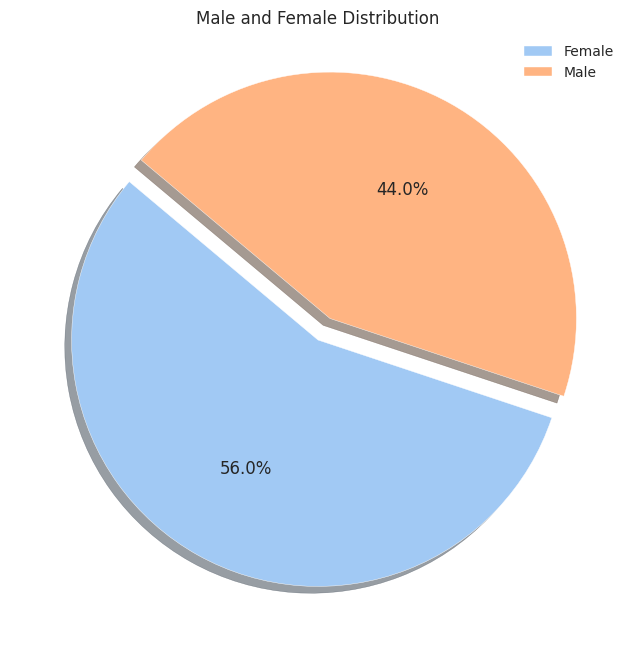

In [118]:
plt.figure(figsize=(8, 8))

explode = [0, 0.1]
plt.pie(df['Gender'].value_counts(),
        explode=explode,
        autopct='%1.1f%%',
        shadow=True,
        startangle=140)
plt.legend(labels=['Female', 'Male'])
plt.title('Male and Female Distribution')
plt.axis('off')
# We compare gender ratios, which is one of the important issues in customer segmentation.

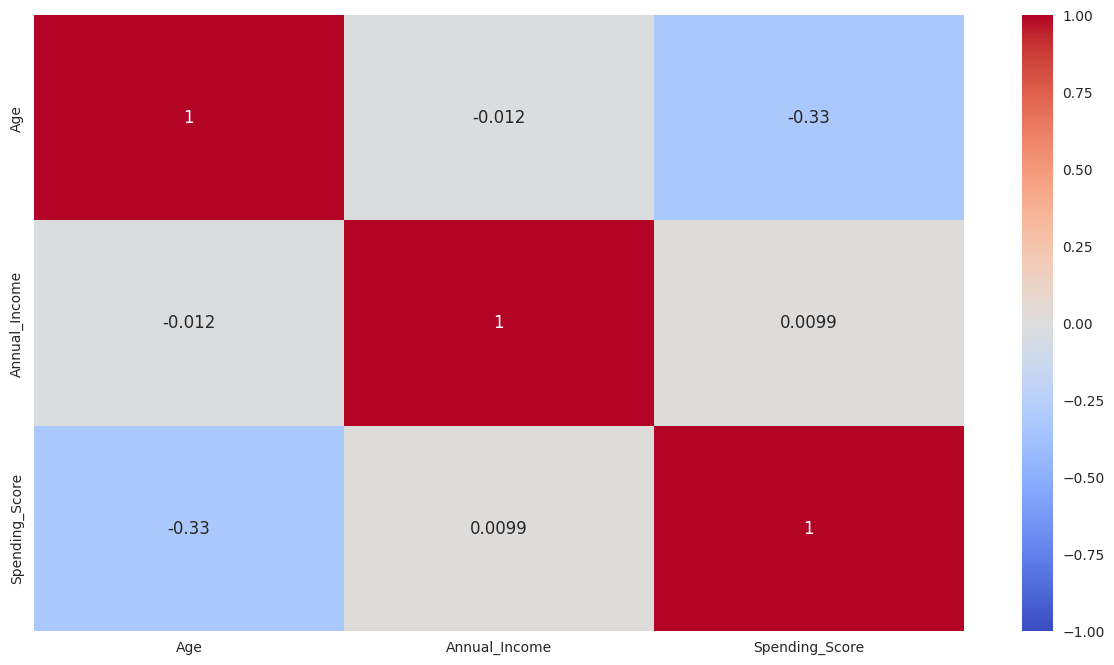

In [120]:
# Set the figure size for the heatmap
plt.figure(figsize=(15, 8))
# Create a heatmap of the correlation matrix
# - 'df.corr()' computes the correlation matrix of the DataFrame 'df'.
# - 'annot=True' displays the correlation values on the heatmap.
# - 'vmin' and 'vmax' set the range for color mapping to represent correlation values.
# - 'cmap' defines the color map, in this case, "coolwarm" for a blue-to-red color scale.
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

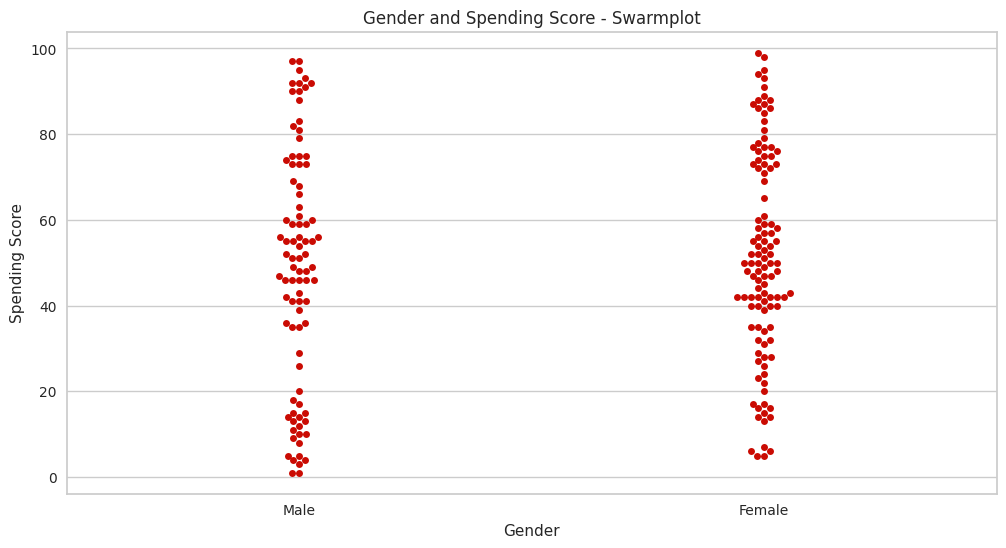

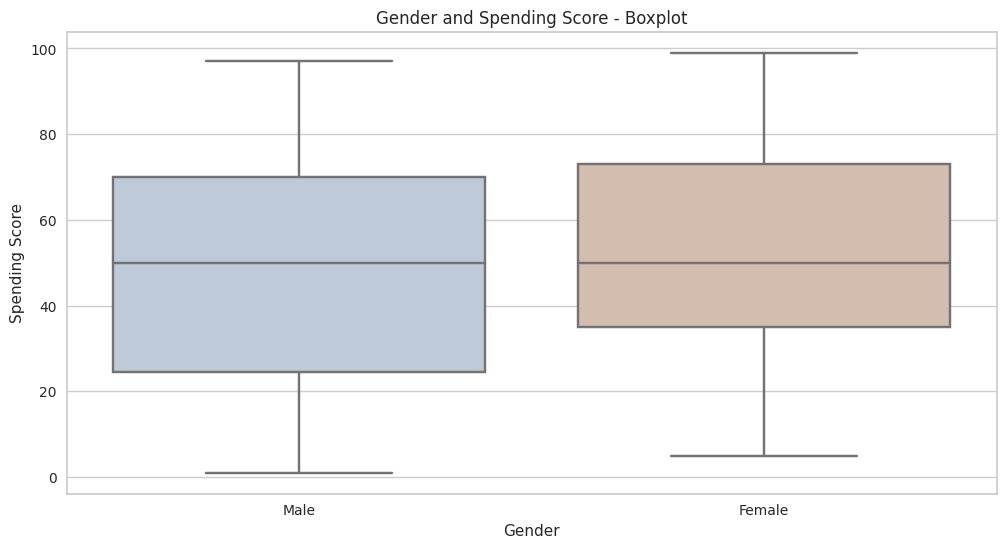

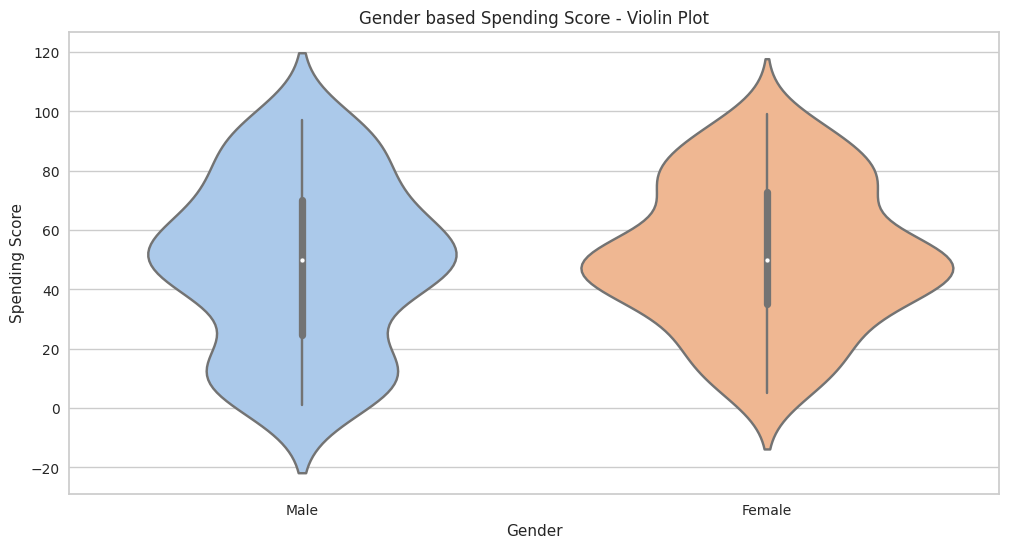

In [125]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x='Gender', y='Spending_Score', data=df, color="r")
plt.title('Gender and Spending Score - Swarmplot')
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Spending_Score', data=df, saturation=.3)
plt.title('Gender and Spending Score - Boxplot')
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.figure(figsize=(12, 6))
sns.violinplot(x='Gender', y='Spending_Score', data=df)
plt.title('Gender based Spending Score - Violin Plot')
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.show()

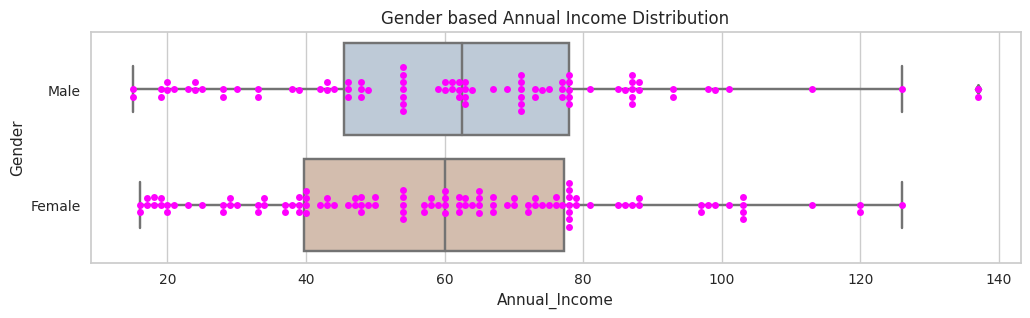

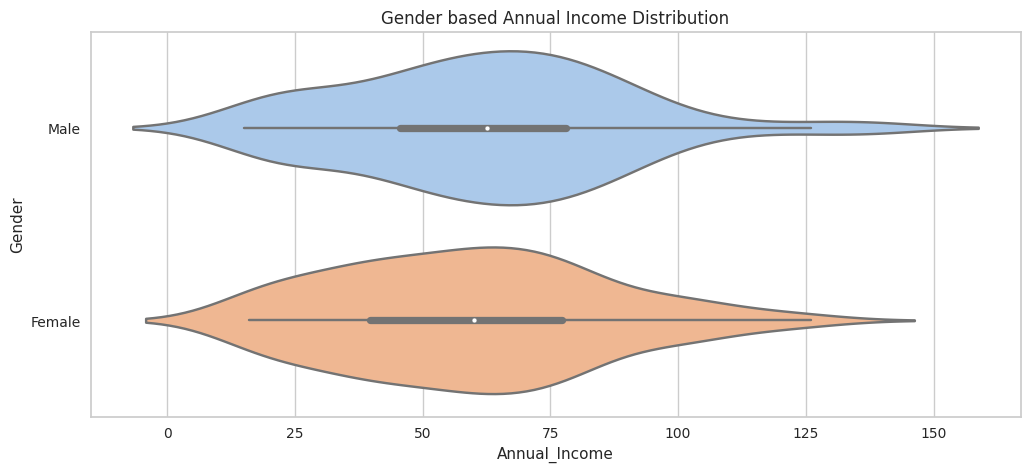

In [126]:
plt.figure(figsize=(12, 3))
sns.swarmplot(x='Annual_Income', y='Gender', data=df, color="magenta")
sns.boxplot(x='Annual_Income', y='Gender', data=df, saturation=0.3)
plt.title('Gender based Annual Income Distribution')
plt.show()

plt.figure(figsize=(12, 5))
sns.violinplot(x='Annual_Income', y='Gender', data=df, orient="h")
plt.title('Gender based Annual Income Distribution')
plt.show()

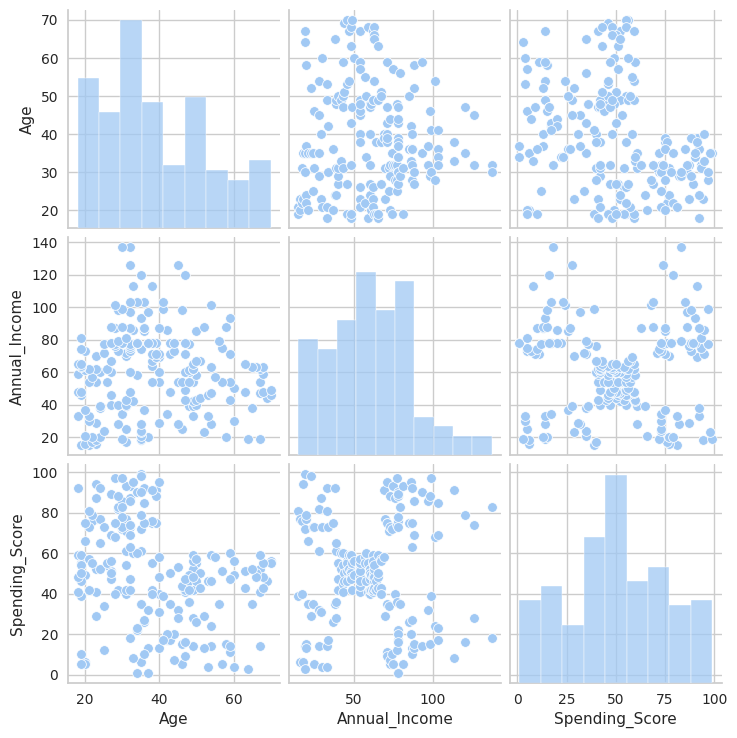

In [127]:
sns.pairplot(df);

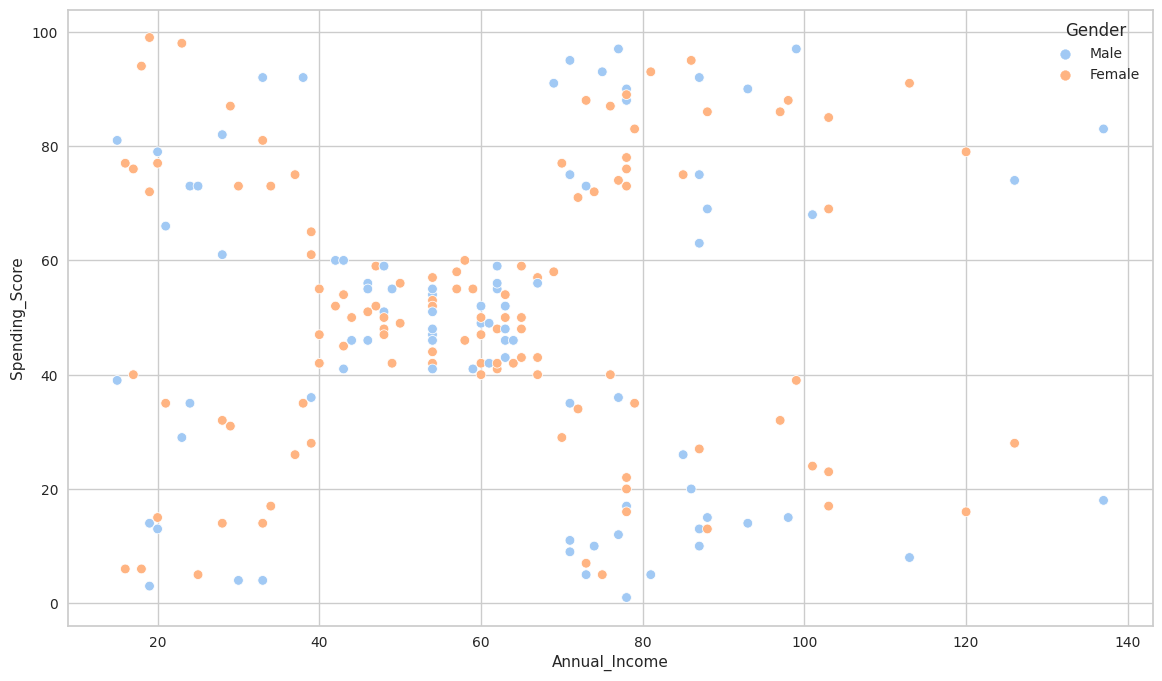

In [128]:
plt.figure(figsize=(14, 8))

sns.scatterplot(x='Annual_Income', y='Spending_Score', data=df, hue="Gender")
plt.show()

---
---

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

## Scaling Data

**The K-means algorithm definitely needs scaling**. However, if all our features are in the same/similar range, **there is no need to scale the data**. For these data, scaling may cause worse results in some cases. You should try data both with and without scale and continue with whichever one has good results.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [130]:
df_2 = df.drop(columns="Gender")
df_2
# We do not use categorical features in k-means algorithms.

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [133]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
import pandas as pd

def hopkins(X, ratio=0.05):
    if not isinstance(X, np.ndarray):
        X = X.values
    sample_size = int(X.shape[0] * ratio)
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0), (sample_size, X.shape[1]))
    random_indices = sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs = neigh.fit(X)
    u_distances, u_indices = nbrs.kneighbors(X_uniform_random_sample, n_neighbors=2)
    u_distances = u_distances[:, 0]
    w_distances, w_indices = nbrs.kneighbors(X_sample, n_neighbors=2)
    w_distances = w_distances[:, 1]
    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)
    H = u_sum / (u_sum + w_sum)
    return H

In [135]:
hopkins(df_2, 1)
# Calculate the Hopkins statistic for the dataset 'df_2' with a random sample size ratio of 1.
# The Hopkins statistic measures the clustering tendency of the data.
# A higher value of the Hopkins statistic indicates a stronger clustering tendency.
# The function 'hopkins' generates random samples from the dataset and compares the distances
# between these random samples and the actual data points to assess clustering tendency.

0.6813215682819924

In [136]:
X_age_ss = df.loc[:,['Age','Spending_Score']]
X_age_ss

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [137]:
hopkins(X_age_ss, 1)

0.705821843391193

#### *ii. Determine optimal number of clusters*

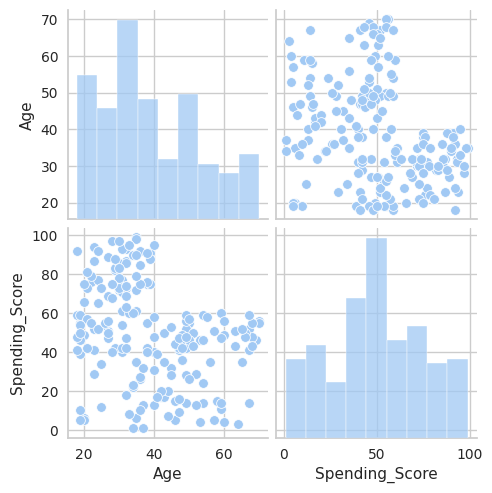

In [138]:
sns.pairplot(X_age_ss);
# We look at the distributions of age and spending score.

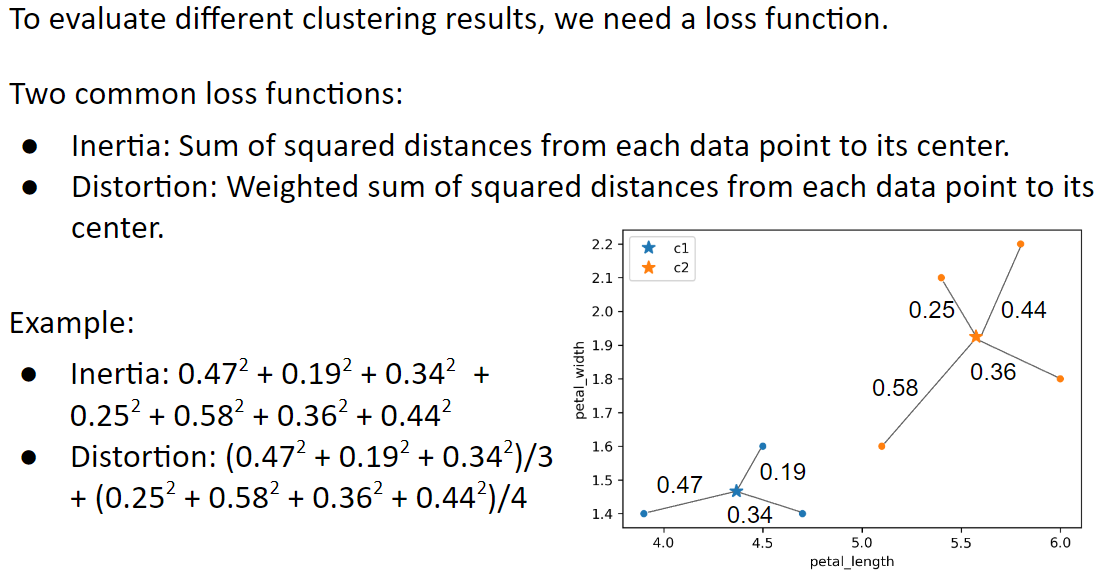

### inertia

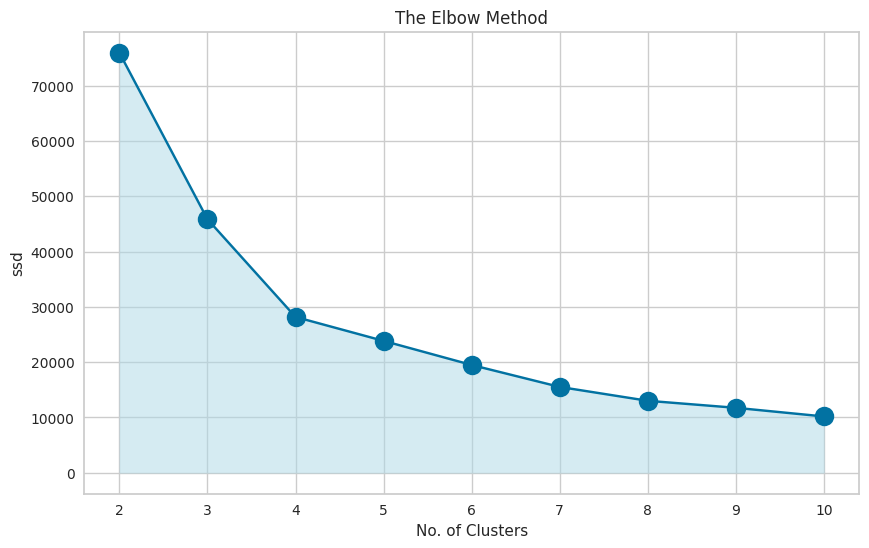

In [141]:
ssd = []
X = X_age_ss
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), ssd, "bo-", markersize=14.0)
plt.fill_between(range(2, 11), ssd, color='lightblue', alpha=0.5)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('ssd')
plt.show()

### distortion

Text(0.5, 1.0, 'elbow method')

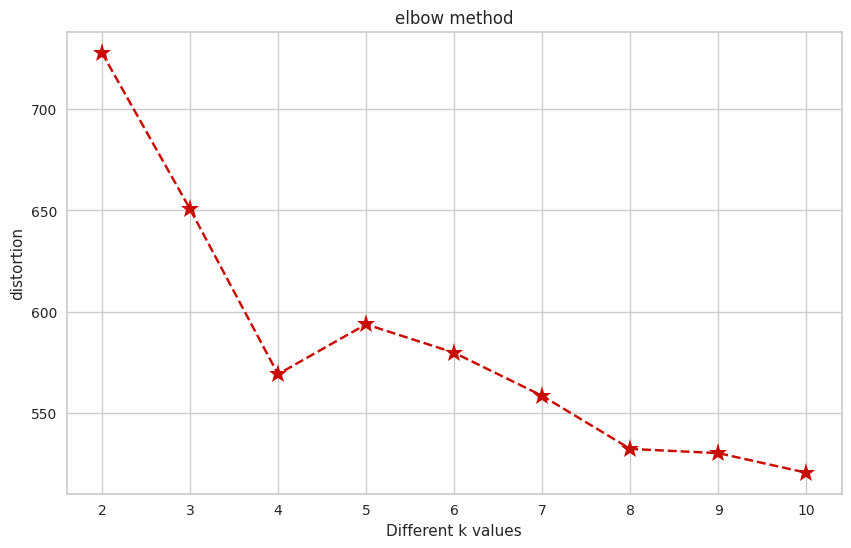

In [145]:
K = range(2, 11)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(X_age_ss)
    distances = kmeanModel.transform(X_age_ss) # distances from each observation to each cluster centroid
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(sum(result)) # sum the means of all clusters and add it to the distortion list

plt.figure(figsize=(10,6))
plt.plot(K, distortion, "r*--", markersize=14.0)
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

### silhoutte_score

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107
For n_clusters=9, the silhouette score is 0.41485342159923116
For n_clusters=10, the silhouette score is 0.4141899863508767


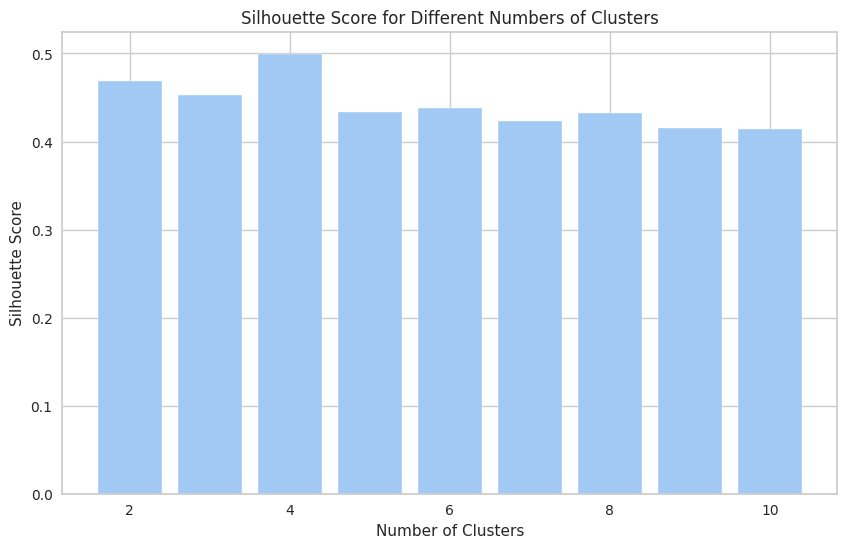

In [148]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_age_ss)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_age_ss, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

plt.figure(figsize=(10, 6))
plt.bar(range_n_clusters, silhouette_scores, align='center')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

### silhoutte score of each cluster

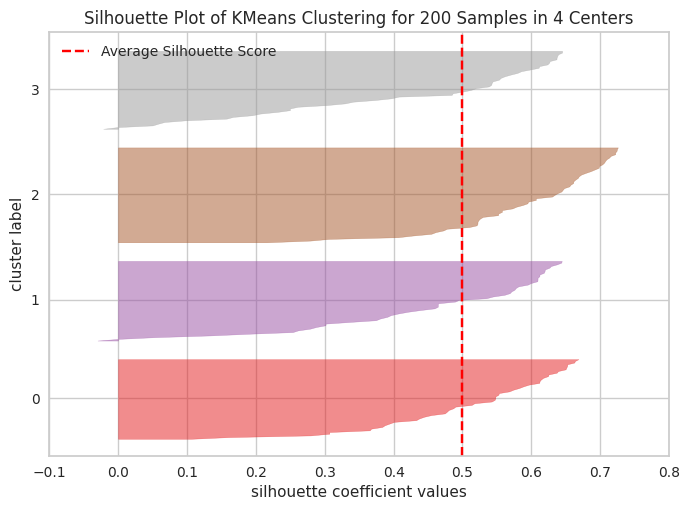

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [151]:
# Import the necessary libraries for clustering analysis and visualization.
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

# Create a K-Means clustering model with 4 clusters and a fixed random state for reproducibility.
model3 = KMeans(n_clusters=4, random_state=42)

# Initialize a SilhouetteVisualizer using the K-Means model.
visualizer = SilhouetteVisualizer(model3)

# Fit the visualizer to the data (X_age_ss) and display the Silhouette plot.
visualizer.fit(X_age_ss)
visualizer.poof()

In [152]:
model3.n_clusters


4

In [154]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calculate the silhouette scores for each data point
sample_silhouette_values = silhouette_samples(X_age_ss, model3.labels_)

for cluster in range(model3.n_clusters):
    cluster_silhouette_values = sample_silhouette_values[model3.labels_ == cluster]
    cluster_mean_silhouette = cluster_silhouette_values.mean()
    print(f"Mean silhouette score for label {cluster:<4}: {cluster_mean_silhouette}")

# Calculate the mean silhouette score for all labels
overall_mean_silhouette = silhouette_score(X_age_ss, model3.labels_)
print(f"Mean silhouette score for all labels: {overall_mean_silhouette}")

Mean silhouette score for label 0   : 0.5091299145013191
Mean silhouette score for label 1   : 0.45429047261675404
Mean silhouette score for label 2   : 0.5960779476836082
Mean silhouette score for label 3   : 0.4197289676734112
Mean silhouette score for all labels: 0.49973941540141753


### Why silhouette_score is negative?

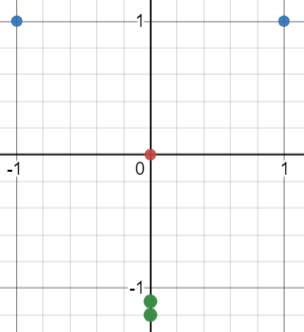

https://stackoverflow.com/questions/63639841/how-can-silhouette-scores-be-negative

#### *iii. Apply K Means*

In [156]:
kmeans = KMeans(n_clusters=4, random_state=42)

In [157]:
kmeans.fit_predict(X_age_ss)

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [159]:
df_age_ss = X_age_ss.copy()
df_age_ss

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [160]:
df_age_ss["cluster_Kmeans"] = kmeans.fit_predict(X_age_ss)

In [161]:
df_age_ss

,Age,Spending_Score,cluster_Kmeans
0,19,39,3
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,3
...,...,...,...
195,35,79,2
196,45,28,1
197,32,74,2
198,32,18,1


#### *iv. Visualizing and Labeling All the Clusters*

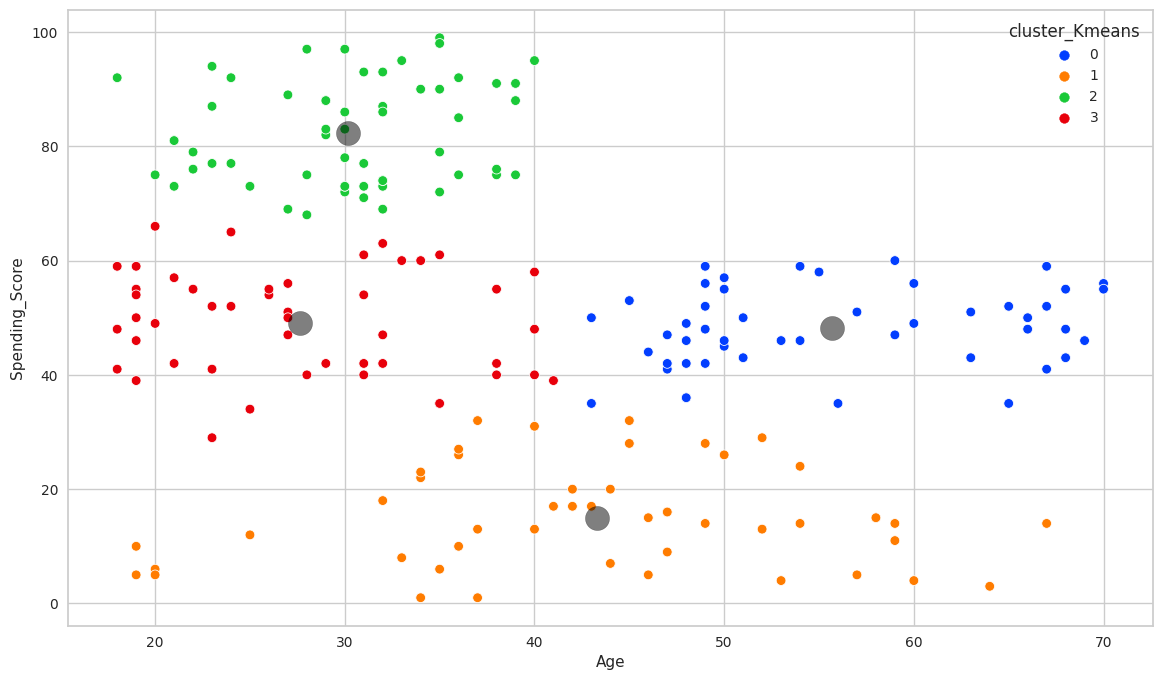

In [166]:
# Create a new figure with the specified size
plt.figure(figsize=(14, 8))

# Create a scatter plot of Age vs. Spending Score, color-coded by the K-Means cluster assignments
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster_Kmeans', data=df_age_ss, palette="bright")

# Get the cluster centers from the K-Means model
centers = kmeans.cluster_centers_

# Scatter plot the cluster centers as black points with a larger size and slight transparency
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5)

# Add a comment to describe the purpose of the plot
# We look at clusters and centroids formed by age and spending score.

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [168]:
X_ai_ss = df[['Annual_Income','Spending_Score']]
X_ai_ss.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [169]:
hopkins(X_ai_ss, 1)

0.6990625983561937

#### *ii. Determine optimal number of clusters*

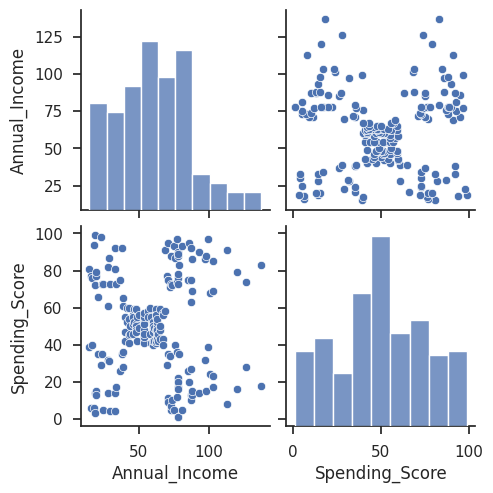

In [171]:
# Set the style and context for the plot
sns.set(style="ticks")
sns.set_context("notebook")

# Create a pairplot of the data
sns.pairplot(X_ai_ss)

# Add a comment to describe the purpose of the pairplot
# We look at the distributions and relationships between Annual_Income and Spending_Score.
plt.show()

### inertia

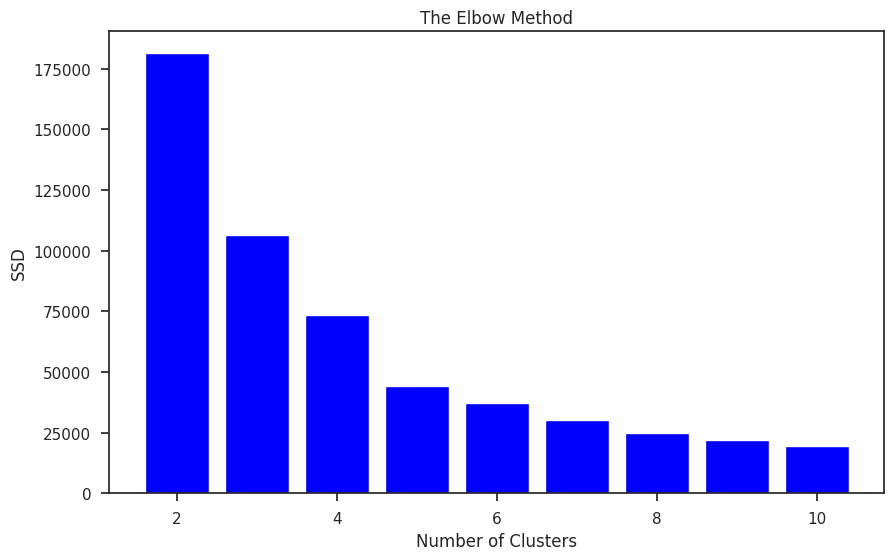

In [173]:
ssd = []

for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_ai_ss)
    ssd.append(kmeans.inertia_)

# Create a bar chart to visualize the SSD for different numbers of clusters
plt.figure(figsize=(10, 6))
plt.bar(range(2, 11), ssd, align='center', color='blue')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSD')
plt.show()

### distortion

Text(0.5, 1.0, 'elbow method')

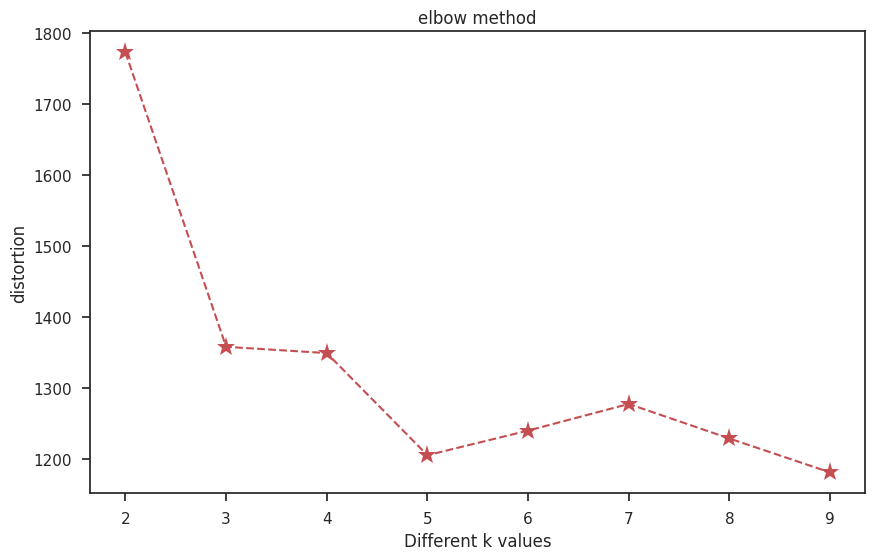

In [177]:
K = range(2, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(X_ai_ss)
    distances = kmeanModel.transform(X_ai_ss)
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i]
        result.append(np.mean(cluster_distances ** 2))
    distortion.append(sum(result))

plt.figure(figsize=(10,6))
plt.plot(K, distortion, "r*--", markersize=14.0)
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

### silhouette_score

In [180]:
from sklearn.metrics import silhouette_samples

range_n_clusters = range(2, 11)

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_ai_ss)
    cluster_labels = kmeans.labels_

    # Calculate silhouette scores for each sample (data point)
    silhouette_scores = silhouette_samples(X_ai_ss, cluster_labels)

    # Calculate the average silhouette score for this number of clusters
    avg_silhouette_score = silhouette_scores.mean()

    print(f"For n_clusters={num_clusters}, the silhouette score is {avg_silhouette_score:.2f}")

For n_clusters=2, the silhouette score is 0.30
For n_clusters=3, the silhouette score is 0.47
For n_clusters=4, the silhouette score is 0.49
For n_clusters=5, the silhouette score is 0.55
For n_clusters=6, the silhouette score is 0.54
For n_clusters=7, the silhouette score is 0.53
For n_clusters=8, the silhouette score is 0.46
For n_clusters=9, the silhouette score is 0.46
For n_clusters=10, the silhouette score is 0.46


### silhouette_score of each cluster

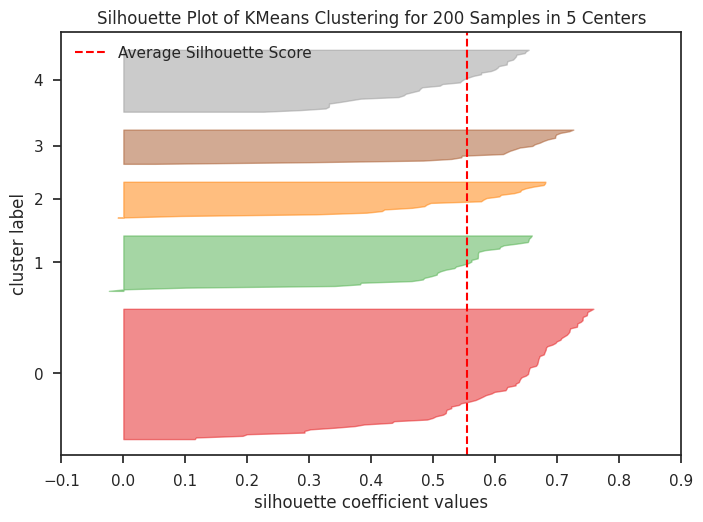

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [189]:
# Create a K-Means model with 5 clusters and set a random seed for reproducibility
model4 = KMeans(n_clusters=5, random_state=42)

# Create a Silhouette Visualizer using the K-Means model
visualizer = SilhouetteVisualizer(model4)

# Fit the data to the Silhouette Visualizer for analysis
visualizer.fit(X_ai_ss)

# Display the Silhouette plot to visualize the quality of clustering
visualizer.poof()

In [202]:
from sklearn.metrics import silhouette_samples

# Fit the K-Means model to the data
model4.fit(X_ai_ss)

# Get the cluster labels for each data point
cluster_labels = model4.labels_

# Calculate silhouette scores for each data point
silhouette_scores = silhouette_samples(X_ai_ss, cluster_labels)

# Initialize a dictionary to store mean silhouette scores for each cluster
mean_silhouette_scores = {}

# Calculate the mean silhouette score for each cluster
for cluster_id in range(model4.n_clusters):
    cluster_mask = (cluster_labels == cluster_id)
    mean_silhouette = silhouette_scores[cluster_mask].mean()
    mean_silhouette_scores[cluster_id] = mean_silhouette
    print(f"Mean silhouette score for label {cluster_id:<4}: {mean_silhouette:.4f}")

# Calculate the mean silhouette score for all labels
overall_mean_silhouette = np.mean(list(mean_silhouette_scores.values()))
print(f"Mean silhouette score for all labels: {overall_mean_silhouette:.4f}")

Mean silhouette score for label 0   : 0.5967
Mean silhouette score for label 1   : 0.5040
Mean silhouette score for label 2   : 0.5123
Mean silhouette score for label 3   : 0.5990
Mean silhouette score for label 4   : 0.5092
Mean silhouette score for all labels: 0.5442


#### *iii. Apply K Means*

In [205]:
kmeans2 = KMeans(n_clusters=5, random_state=42)
kmeans2.fit_predict(X_ai_ss)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [206]:
df_ai_ss = X_ai_ss.copy()
df_ai_ss.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [207]:
df_ai_ss['cluster_Kmeans'] = kmeans2.fit_predict(X_ai_ss) #kmeans2.labels_
df_ai_ss

,Annual_Income,Spending_Score,cluster_Kmeans
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
...,...,...,...
195,120,79,4
196,126,28,1
197,126,74,4
198,137,18,1


#### *iv. Visualizing and Labeling All the Clusters*

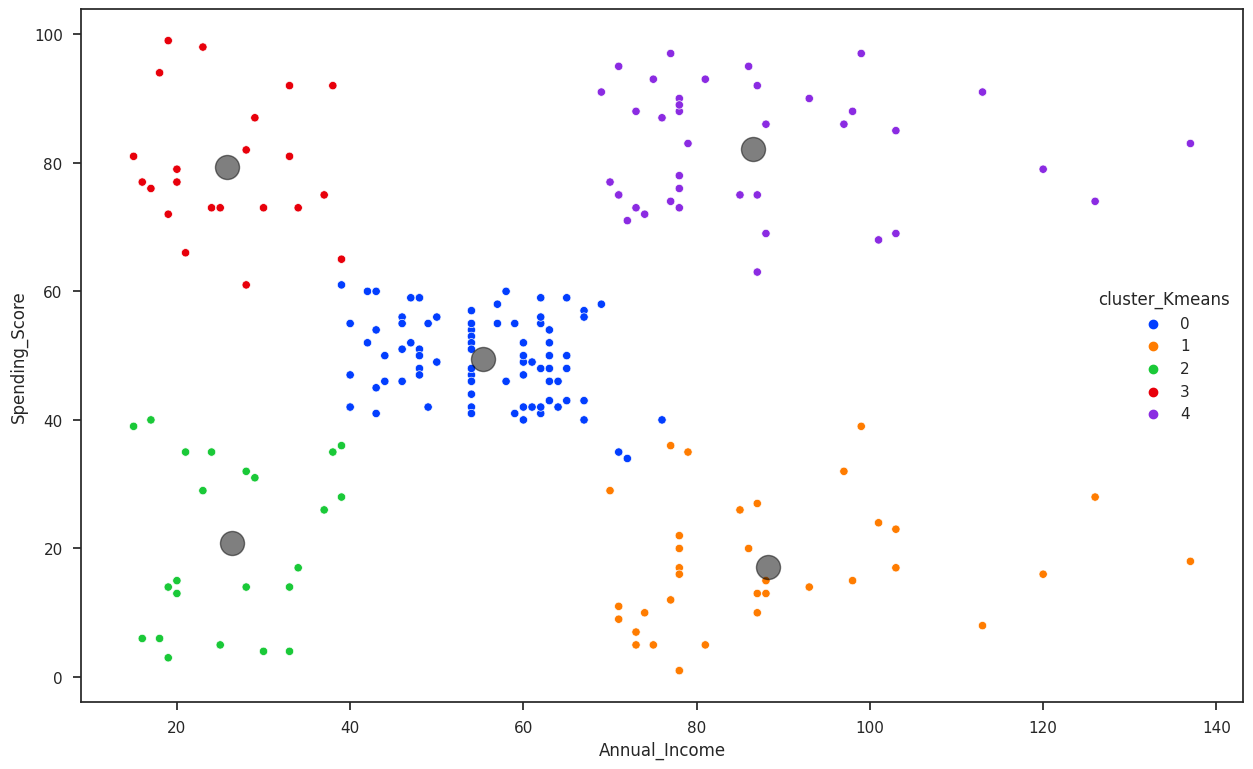

In [212]:
from sklearn.cluster import KMeans

# Create a K-Means model with 5 clusters and set a random seed for reproducibility
kmeans2 = KMeans(n_clusters=5, random_state=42)

# Fit the model to the data and predict cluster labels for each data point
cluster_labels = kmeans2.fit_predict(X_ai_ss)

# Add the cluster labels as a new column to the DataFrame 'df_ai_ss'
df_ai_ss['cluster_Kmeans'] = cluster_labels

# Create a scatter plot to visualize the clusters and centroids
plt.figure(figsize=(15, 9))
sns.scatterplot(x='Annual_Income',
                y='Spending_Score',
                hue='cluster_Kmeans',
                data=df_ai_ss,
                palette="bright")
centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0],
            centers[:, 1],
            c='black',
            s=300,
            alpha=0.5)

# Add a comment to describe the visualization
# We look at the clusters and centroids formed based on Annual_Income and Spending_Score.

#### We have made our inferences on the Kmeans algorithm so far, and we will take and compare the results with another clustering algorithm, Hierarchical Clustering:


### The point we need to pay attention to is the number of clusters in kmeans so that we can find the differences.

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score

In [213]:
X_age_ss

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [215]:
from scipy.cluster.hierarchy import linkage

# In order to draw a dendrogram, it's not enough to give the data directly, we have to use linkage.

In [216]:
from scipy.cluster.hierarchy import dendrogram

### Dendrogram

interactive(children=(Dropdown(description='method', options=('ward', 'complete', 'average', 'single'), value=…

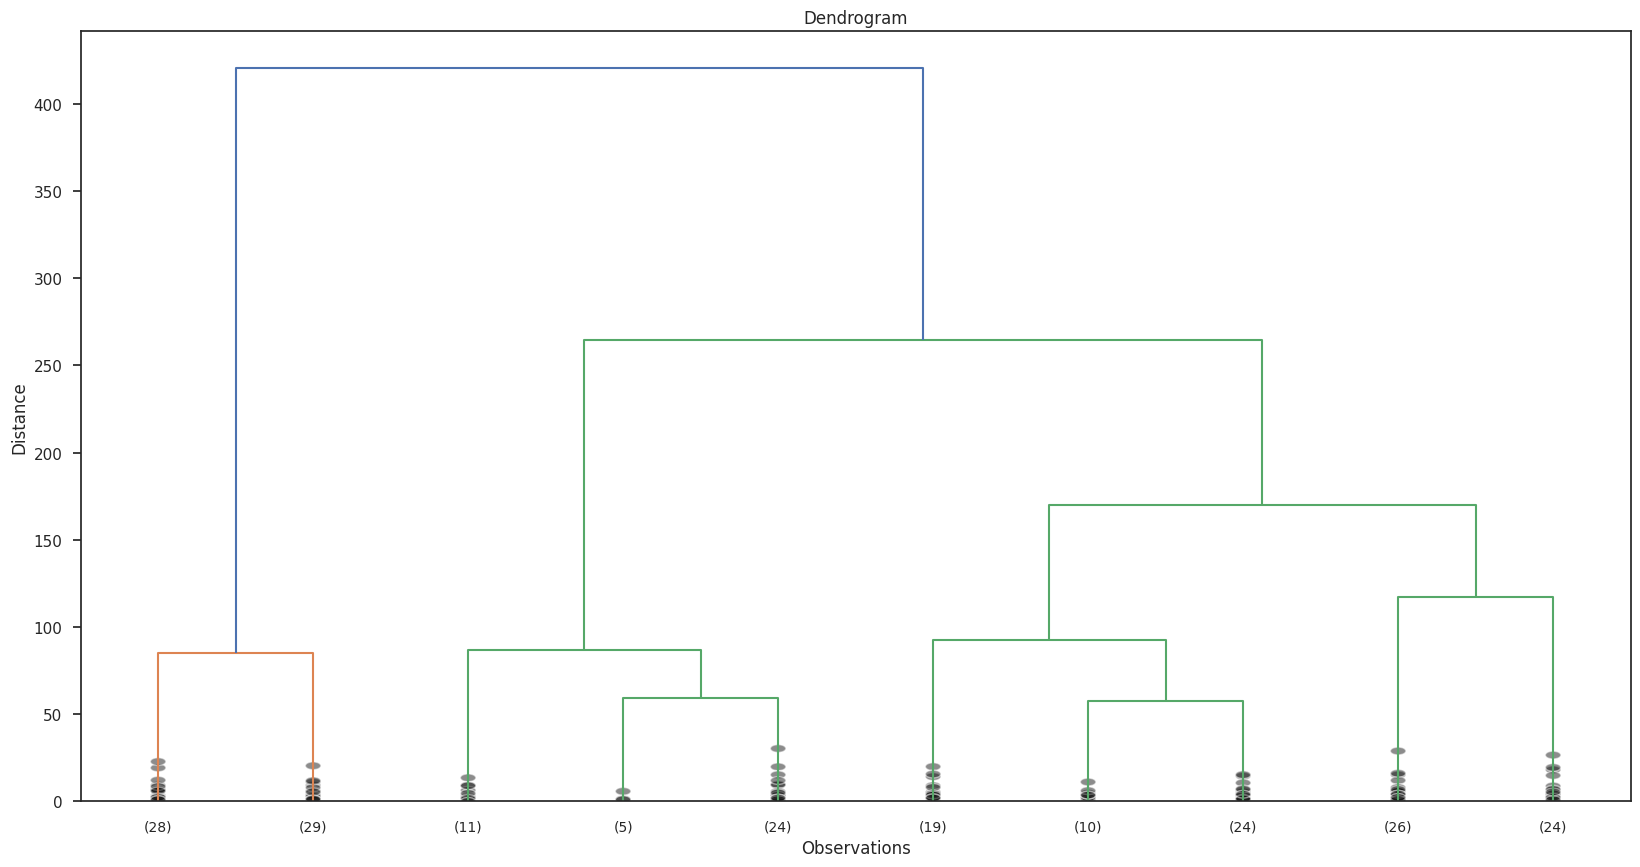

In [218]:
@interact(method=["ward", "complete", "average", "single"])
def dendrogramer(method):
    # Calculate the linkage matrix using the selected method
    link = linkage(y=X_age_ss, method=method)

    # Create a dendrogram plot
    plt.figure(figsize=(20, 10))
    plt.title("Dendrogram")
    plt.xlabel("Observations")
    plt.ylabel("Distance")

    # Display the dendrogram with specified parameters
    dendrogram(link,
               truncate_mode="lastp",
               p=10,
               show_contracted=True,
               leaf_font_size=10)

* Let's pay attention to the scales.

### silhouette_score

In [220]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Define the range of cluster numbers
range_n_clusters = range(2, 11)

for num_clusters in range_n_clusters:
    # Initialize Agglomerative Clustering model with the specified number of clusters
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)

    # Fit the model to the data and obtain cluster labels
    cluster_labels = Agg_model.fit_predict(X_age_ss)

    # Calculate the silhouette score for the clustering
    silhouette_avg = silhouette_score(X_age_ss, cluster_labels)

    # Print the silhouette score for the current number of clusters
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4549465643222241
For n_clusters=3, the silhouette score is 0.4411791686353356
For n_clusters=4, the silhouette score is 0.4602496389565028
For n_clusters=5, the silhouette score is 0.40374071753059787
For n_clusters=6, the silhouette score is 0.4125958704145705
For n_clusters=7, the silhouette score is 0.4158977524079244
For n_clusters=8, the silhouette score is 0.3883688959732531
For n_clusters=9, the silhouette score is 0.3948151533262091
For n_clusters=10, the silhouette score is 0.3876666104778445


## Clustering based on Annual Income and Spending Score

In [221]:
X_ai_ss

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


### Dendrogram

interactive(children=(Dropdown(description='method', options=('ward', 'complete', 'average', 'single'), value=…

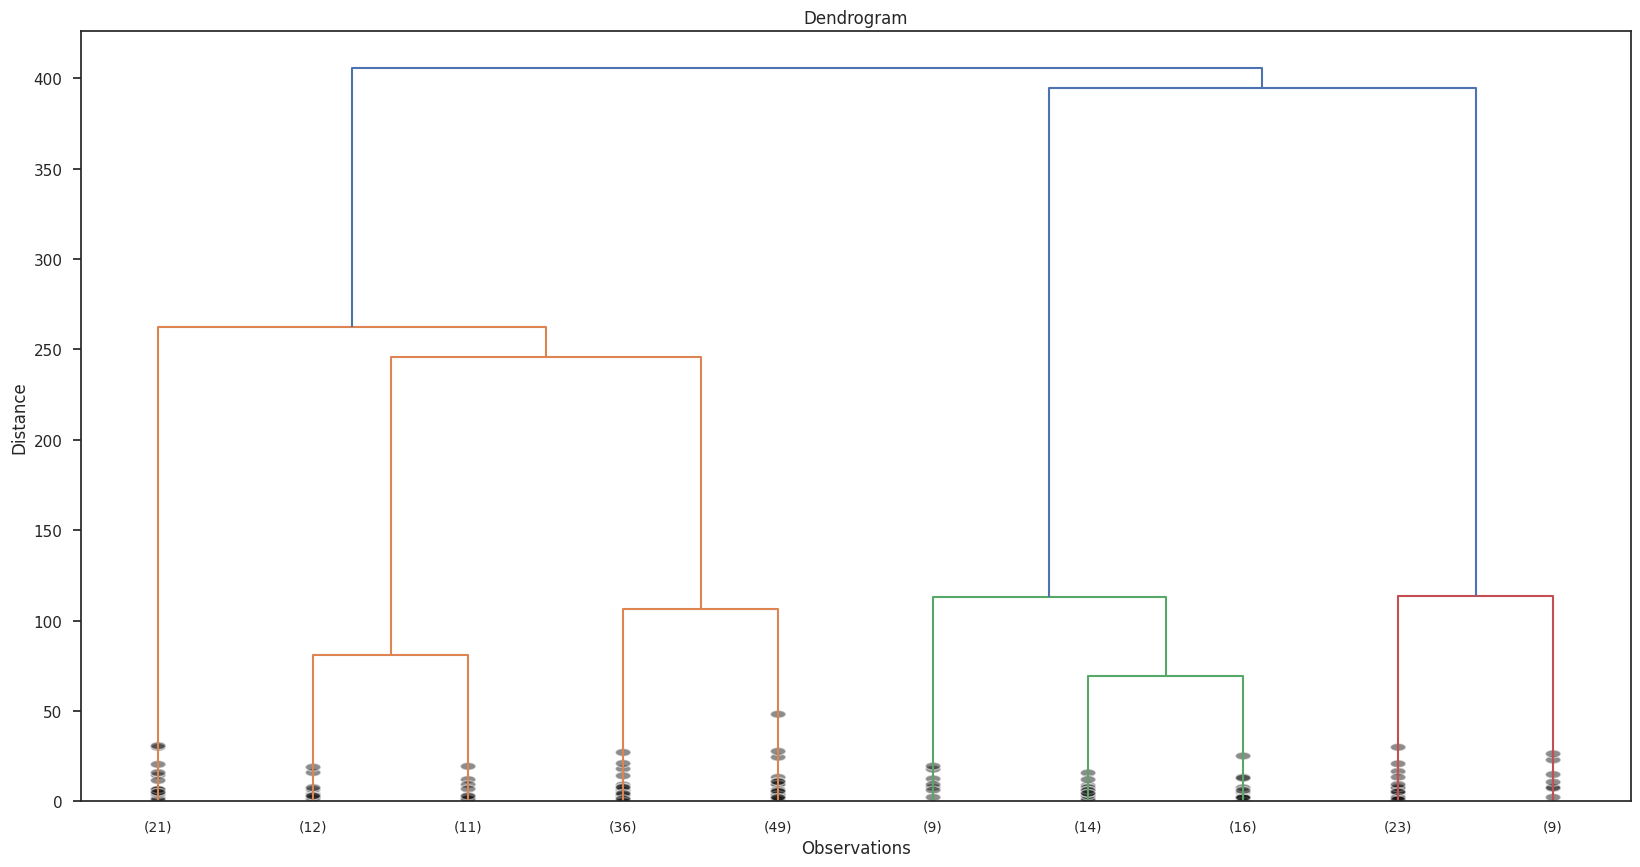

In [223]:
@interact(method=["ward", "complete", "average", "single"])
def dendrogramer(method):
    # Calculate the linkage matrix using the selected method
    link = linkage(y=X_ai_ss, method=method)

    # Create a dendrogram plot
    plt.figure(figsize=(20, 10))
    plt.title("Dendrogram")
    plt.xlabel("Observations")
    plt.ylabel("Distance")

    # Display the dendrogram with specified parameters
    dendrogram(link,
               truncate_mode="lastp",
               p=10,
               show_contracted=True,
               leaf_font_size=10)

### silhouette_score

In [224]:
range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X_ai_ss)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_ai_ss, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.36706444723912895
For n_clusters=3, the silhouette score is 0.4618340266628975
For n_clusters=4, the silhouette score is 0.4916598193892782
For n_clusters=5, the silhouette score is 0.5529945955148897
For n_clusters=6, the silhouette score is 0.5380208285578872
For n_clusters=7, the silhouette score is 0.519904611908887
For n_clusters=8, the silhouette score is 0.4326286245782246
For n_clusters=9, the silhouette score is 0.43892545672004507
For n_clusters=10, the silhouette score is 0.4342656377895271


### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score

In [266]:
X_age_ss

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [275]:
Agg1 = AgglomerativeClustering(n_clusters=4,affinity="euclidean", linkage="ward")

y_agg = Agg1.fit_predict(X_age_ss)

In [276]:
df_age_ss

,Age,Spending_Score,cluster_Kmeans,cluster_Agg
0,19,39,3,0
1,21,81,2,3
2,20,6,1,2
3,23,77,2,3
4,31,40,3,0
...,...,...,...,...
195,35,79,2,3
196,45,28,1,0
197,32,74,2,3
198,32,18,1,2


In [277]:
df_age_ss['cluster_Agg'] = y_agg
df_age_ss.head()

,Age,Spending_Score,cluster_Kmeans,cluster_Agg
0,19,39,3,0
1,21,81,2,3
2,20,6,1,2
3,23,77,2,3
4,31,40,3,0


#### Annual Income and Spending Score

In [278]:
X_ai_ss

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [279]:
Agg2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_agg2 = Agg2.fit_predict(X_ai_ss)

In [280]:
df_ai_ss

,Annual_Income,Spending_Score,cluster_Kmeans,cluster_Agg
0,15,39,2,4
1,15,81,3,3
2,16,6,2,4
3,16,77,3,3
4,17,40,2,4
...,...,...,...,...
195,120,79,4,2
196,126,28,1,0
197,126,74,4,2
198,137,18,1,0


In [273]:
df_ai_ss['cluster_Agg'] = y_agg2
df_ai_ss.head()

,Annual_Income,Spending_Score,cluster_Kmeans,cluster_Agg
0,15,39,2,4
1,15,81,3,3
2,16,6,2,4
3,16,77,3,3
4,17,40,2,4


### iii. *Visualizing and Labeling All the Clusters*

#### Age and Spending Score

In [297]:
df_age_ss

,Age,Spending_Score,cluster_Kmeans,cluster_Agg
0,19,39,3,0
1,21,81,2,3
2,20,6,1,2
3,23,77,2,3
4,31,40,3,0
...,...,...,...,...
195,35,79,2,3
196,45,28,1,0
197,32,74,2,3
198,32,18,1,2


<Axes: xlabel='Age', ylabel='Spending_Score'>

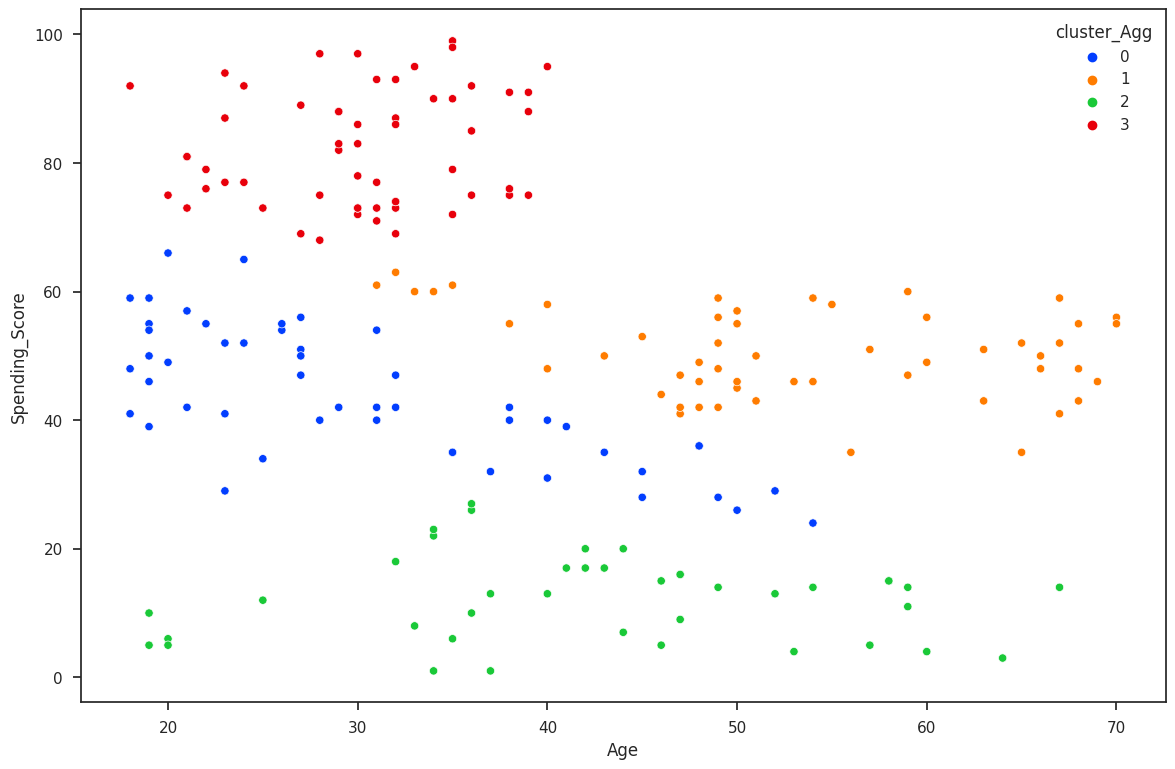

In [298]:
plt.figure(figsize=(14, 9))
sns.scatterplot(x='Age',
                y='Spending_Score',
                hue='cluster_Agg',
                data=df_age_ss,
                palette="bright")

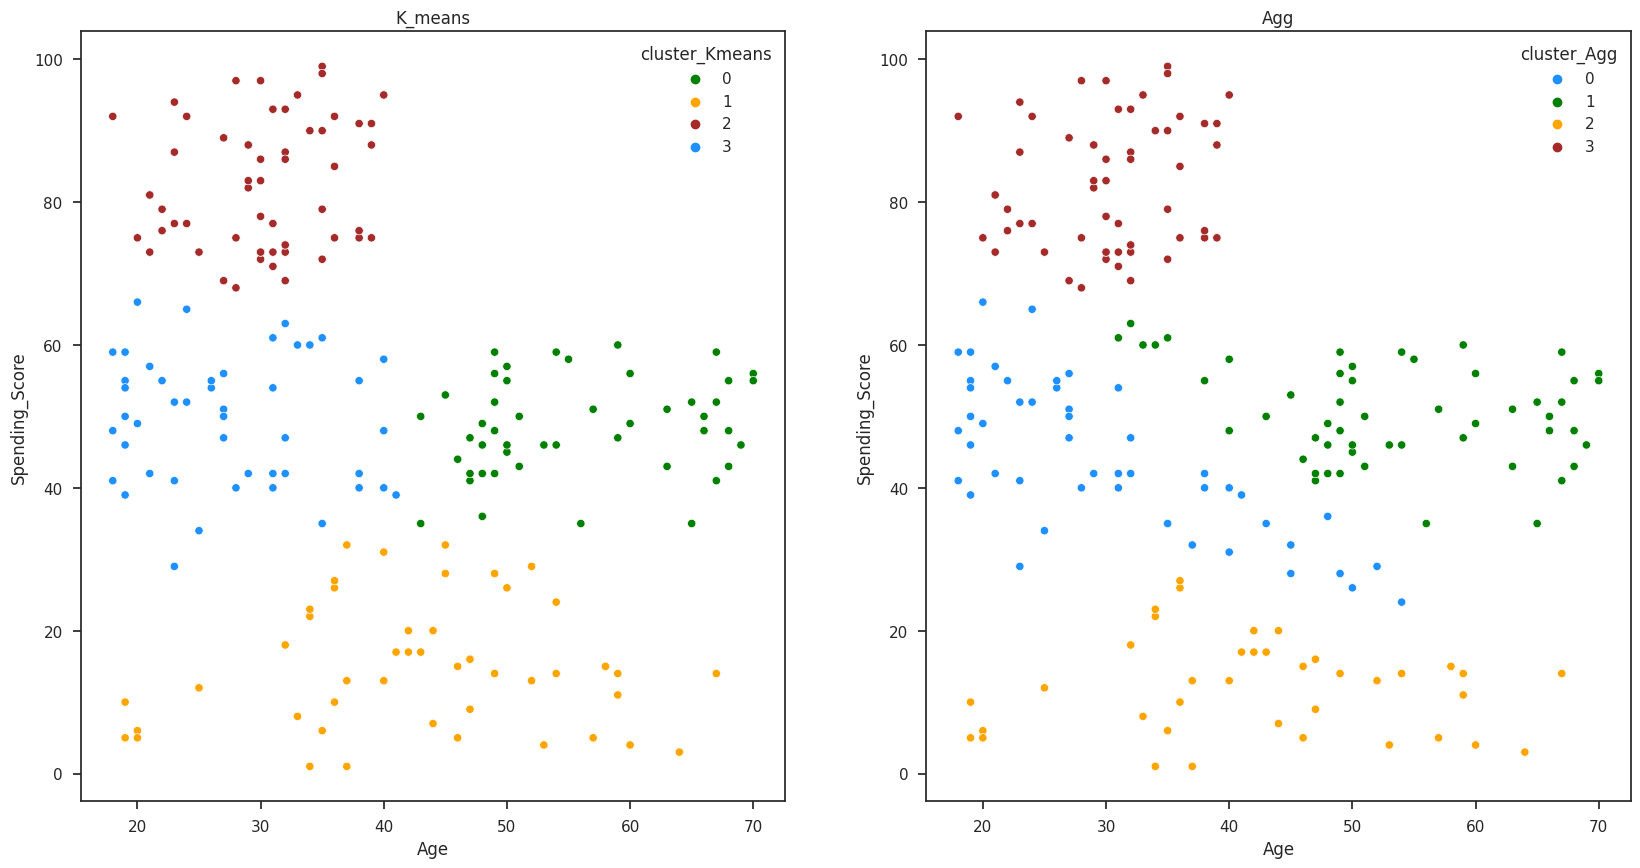

In [283]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
sns.scatterplot(x='Age',
                y='Spending_Score',
                hue='cluster_Kmeans',
                data=df_age_ss,
                palette=['green', 'orange', 'brown', 'dodgerblue'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Age',
                y='Spending_Score',
                hue='cluster_Agg',
                data=df_age_ss,
                palette=['dodgerblue', 'green', 'orange', 'brown'])
plt.title("Agg");

#### Annual Income and Spending Score

In [299]:
df_ai_ss

,Annual_Income,Spending_Score,cluster_Kmeans,cluster_Agg
0,15,39,2,4
1,15,81,3,3
2,16,6,2,4
3,16,77,3,3
4,17,40,2,4
...,...,...,...,...
195,120,79,4,2
196,126,28,1,0
197,126,74,4,2
198,137,18,1,0


<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

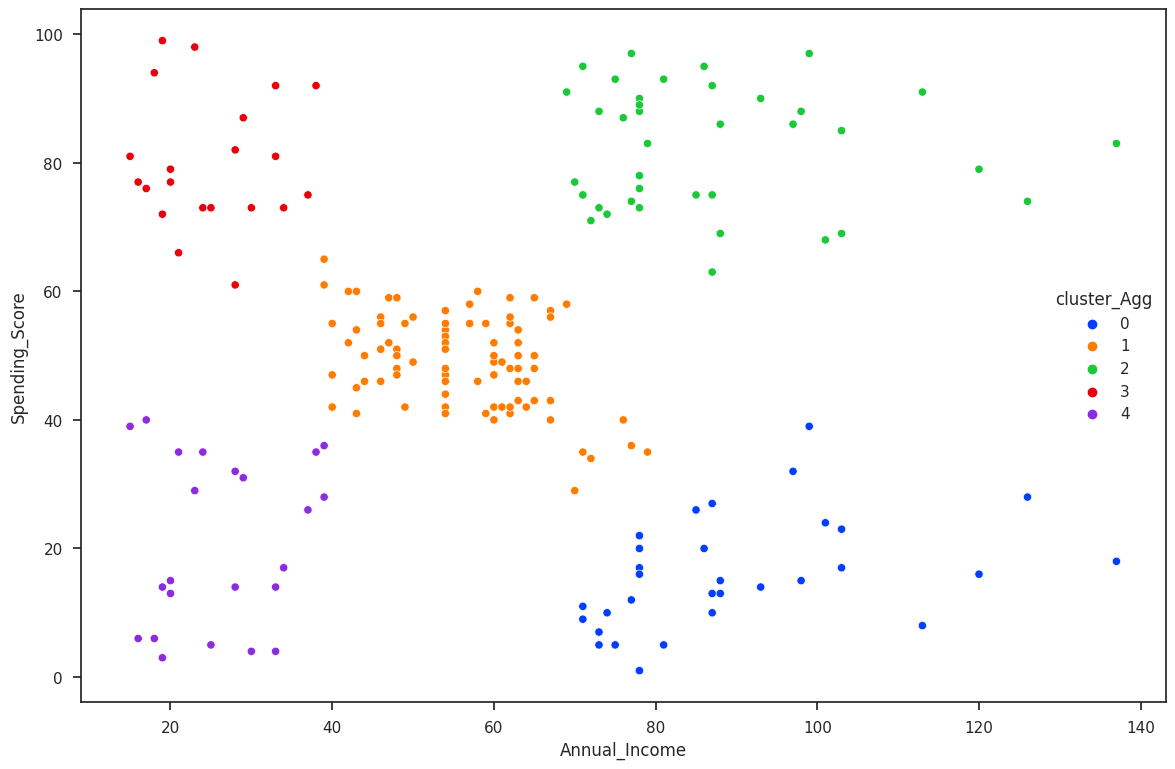

In [300]:
plt.figure(figsize=(14,9))
sns.scatterplot(x='Annual_Income',
                y='Spending_Score',
                hue='cluster_Agg',
                data=df_ai_ss ,
                palette="bright")

Text(0.5, 1.0, 'Agg')

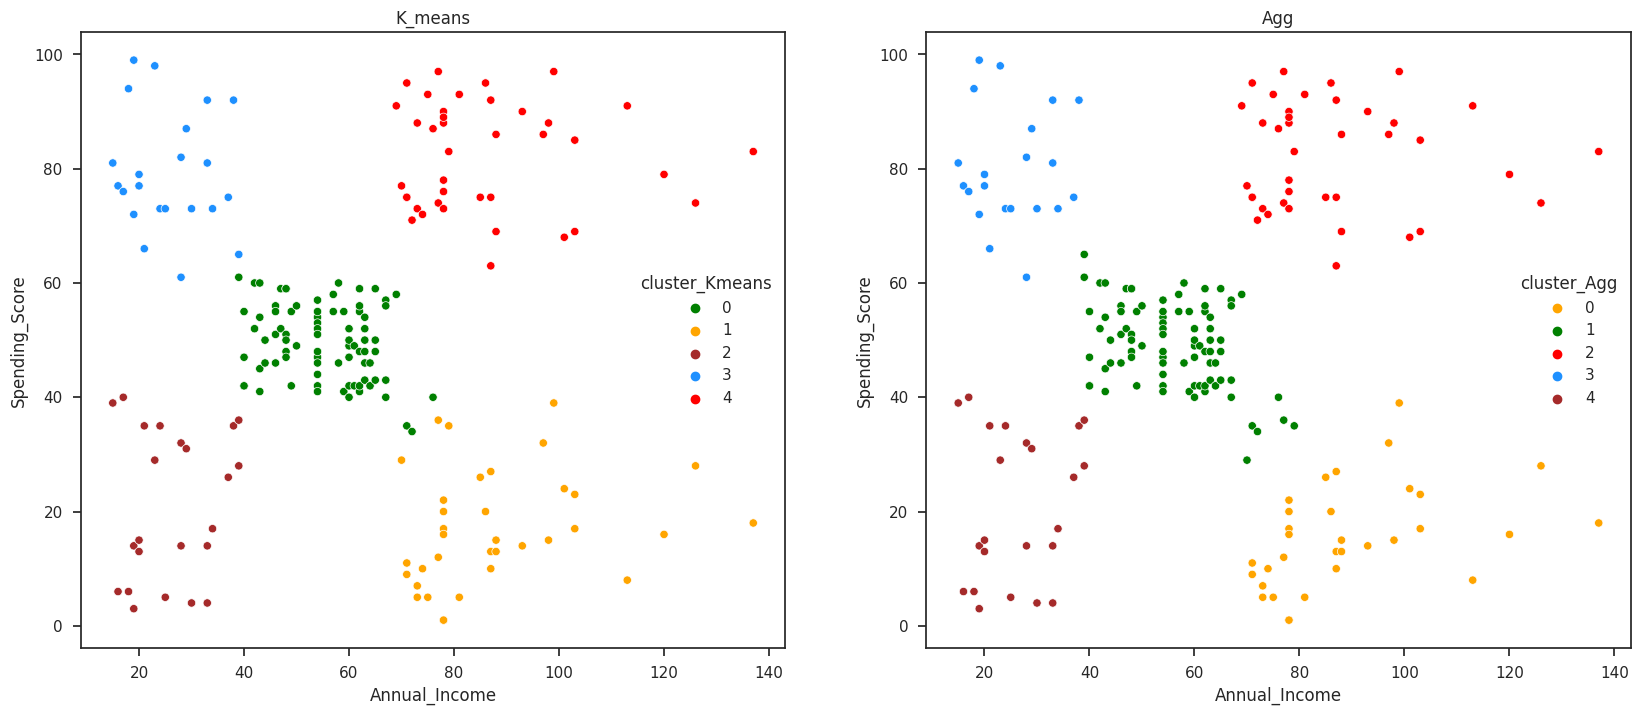

In [287]:
plt.figure(figsize=(20, 8))

plt.subplot(121)
sns.scatterplot(x='Annual_Income',
                y='Spending_Score',
                hue='cluster_Kmeans',
                data=df_ai_ss,
                palette=['green', 'orange', 'brown', 'dodgerblue', 'red'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Annual_Income',
                y='Spending_Score',
                hue='cluster_Agg',
                data=df_ai_ss,
                palette=['orange', 'green', 'red', 'dodgerblue', 'brown'])
plt.title("Agg")

In [288]:
# There are healthier transitions in Kmeans
# We chose the Kmeans algorithm finally

#### Interpretation based on Age and Spending Score

In [289]:
df_age_ss

,Age,Spending_Score,cluster_Kmeans,cluster_Agg
0,19,39,3,0
1,21,81,2,3
2,20,6,1,2
3,23,77,2,3
4,31,40,3,0
...,...,...,...,...
195,35,79,2,3
196,45,28,1,0
197,32,74,2,3
198,32,18,1,2


[Text(0, 0, '57'), Text(0, 0, '48'), Text(0, 0, '48'), Text(0, 0, '47')]

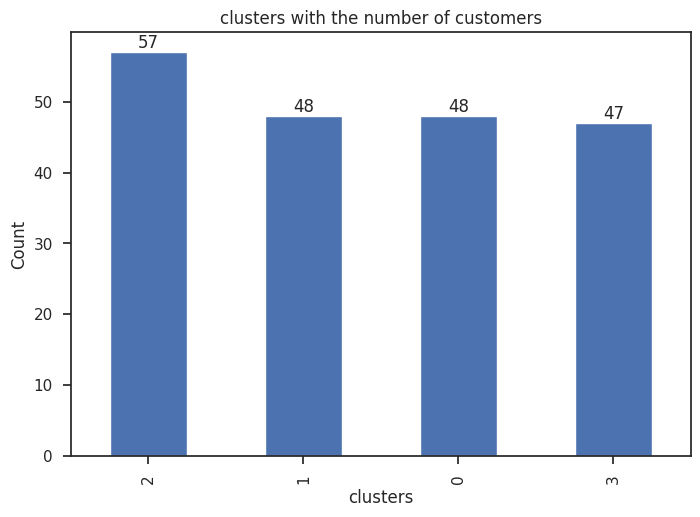

In [290]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = df_age_ss.cluster_Kmeans.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])

In [301]:
df["cluster_Age_Spending_Score"] = df_age_ss["cluster_Kmeans"]
df.head()

,Gender,Age,Annual_Income,Spending_Score,cluster_Age_Spending_Score
0,Male,19,15,39,3
1,Male,21,15,81,2
2,Female,20,16,6,1
3,Female,23,16,77,2
4,Female,31,17,40,3


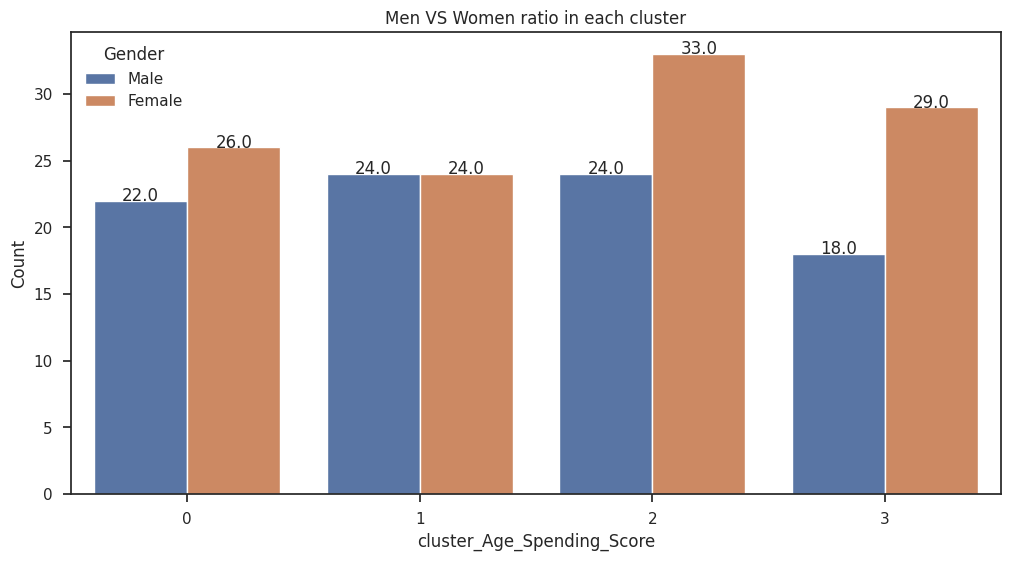

In [302]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Create a countplot to visualize the Men VS Women ratio in each cluster
ax = sns.countplot(x="cluster_Age_Spending_Score", hue="Gender", data=df)

# Add labels to the bars with the counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
plt.show()

In [303]:
df.groupby("cluster_Age_Spending_Score").mean()
# We group them according to the clusters formed.

,Age,Annual_Income,Spending_Score
cluster_Age_Spending_Score,,,
0,55.708333,54.770833,48.229167
1,43.291667,66.937500,15.020833
2,30.175439,66.070175,82.350877
3,27.617021,53.276596,49.148936


<Axes: xlabel='cluster_Age_Spending_Score', ylabel='Spending_Score'>

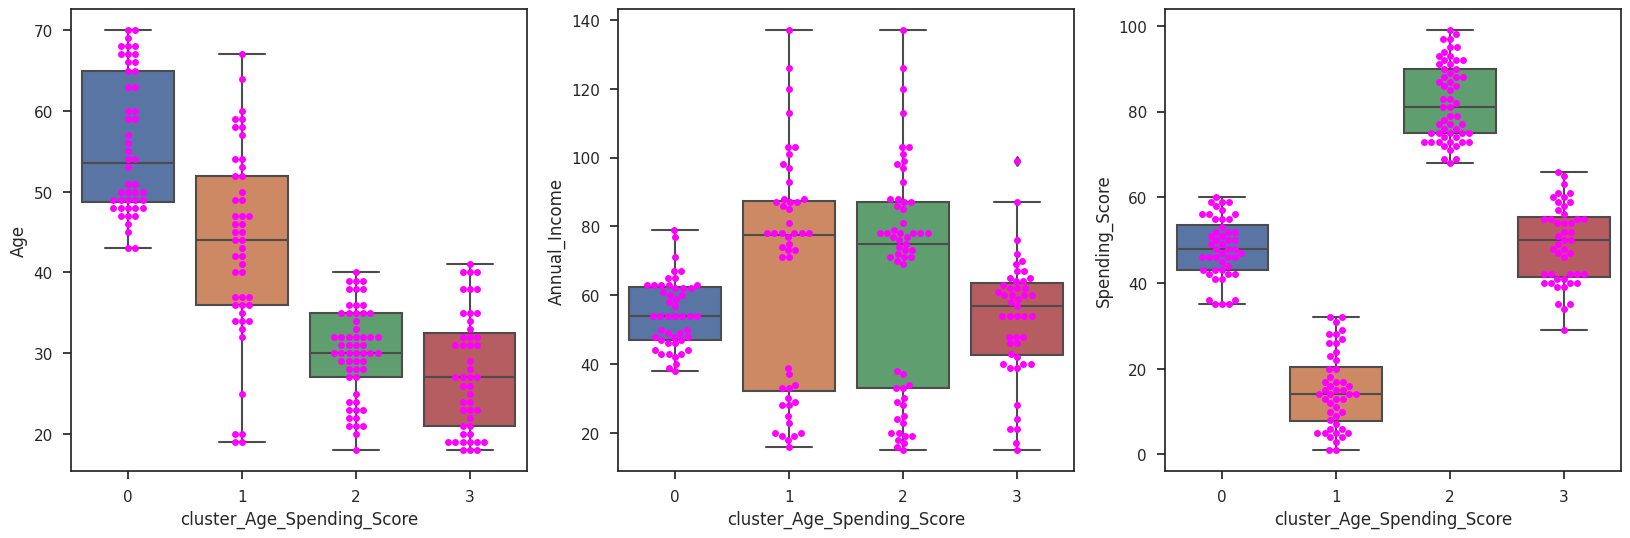

In [304]:
plt.figure(figsize=(20, 6))

plt.subplot(131)
sns.boxplot(y="Age", x="cluster_Age_Spending_Score", data=df)
sns.swarmplot(y="Age",
              x="cluster_Age_Spending_Score",
              data=df,
              color="magenta")

plt.subplot(132)
sns.boxplot(y="Annual_Income", x="cluster_Age_Spending_Score", data=df)
sns.swarmplot(y="Annual_Income",
              x="cluster_Age_Spending_Score",
              data=df,
              color="magenta")

plt.subplot(133)
sns.boxplot(y="Spending_Score", x="cluster_Age_Spending_Score", data=df)
sns.swarmplot(y="Spending_Score",
              x="cluster_Age_Spending_Score",
              data=df,
              color="magenta")

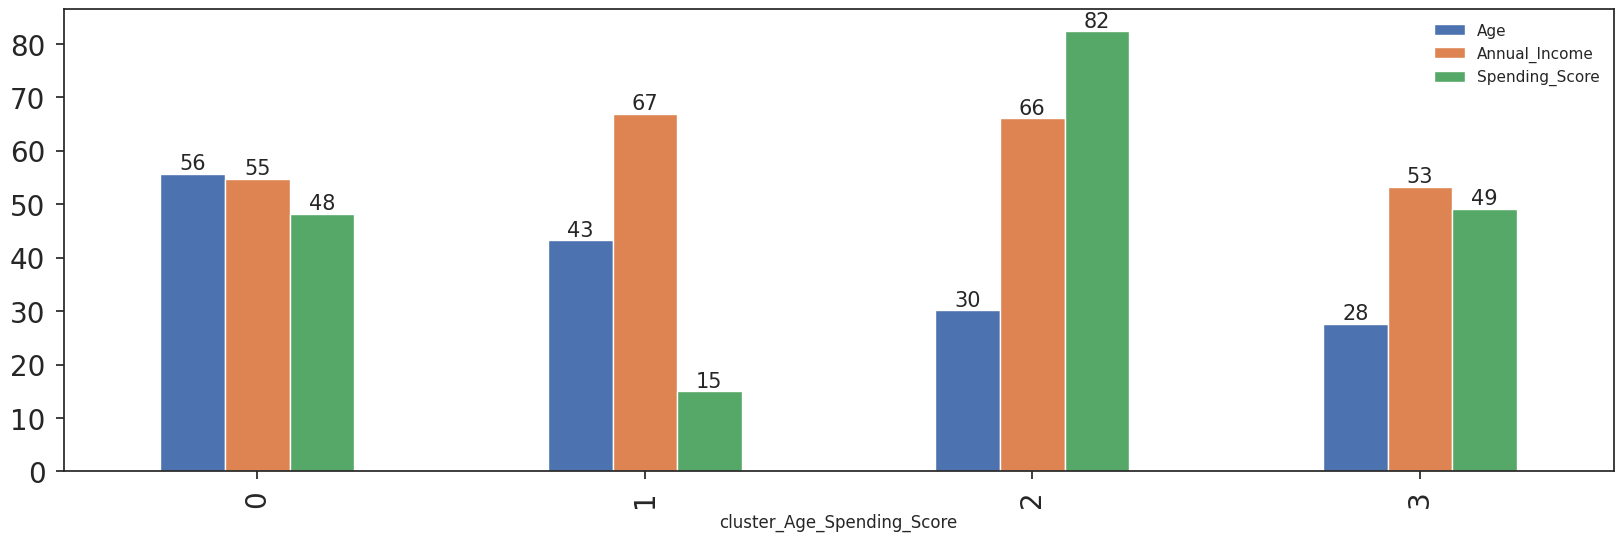

In [307]:
ax = df.groupby("cluster_Age_Spending_Score").mean().plot(kind='bar',
                                                          figsize=(20, 6),
                                                          fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=15)

### Conclusion

# Cluster 0: The average age is around 56. Both annual income and spending scores are on average. It should be researched what can be done to direct them to more spending.

# Cluster 1: The average age is around 43. The annual income is high, but the spending scores are very low. This group is our target audience, and specific strategies should be developed to encourage this group to spend.

# Cluster 2: The average age is around 30. The annual income is high, and spending scores are very high. This group consists of our loyal customers, and our company derives the main profit from this group. Very special promotions can be made to retain them.

# Cluster 3: The average age is around 28. Both annual income and spending scores are on average. It should be researched what can be done to direct them to more spending.


#### Interpretation based on Annual Income and Spending Score

In [250]:
df_ai_ss

,Annual_Income,Spending_Score,cluster_Kmeans,cluster_Agg
0,15,39,2,4
1,15,81,3,3
2,16,6,2,4
3,16,77,3,3
4,17,40,2,4
...,...,...,...,...
195,120,79,4,2
196,126,28,1,0
197,126,74,4,2
198,137,18,1,0


In [251]:
df_ai_ss.cluster_Kmeans.value_counts()

0    81
4    39
1    35
2    23
3    22
Name: cluster_Kmeans, dtype: int64

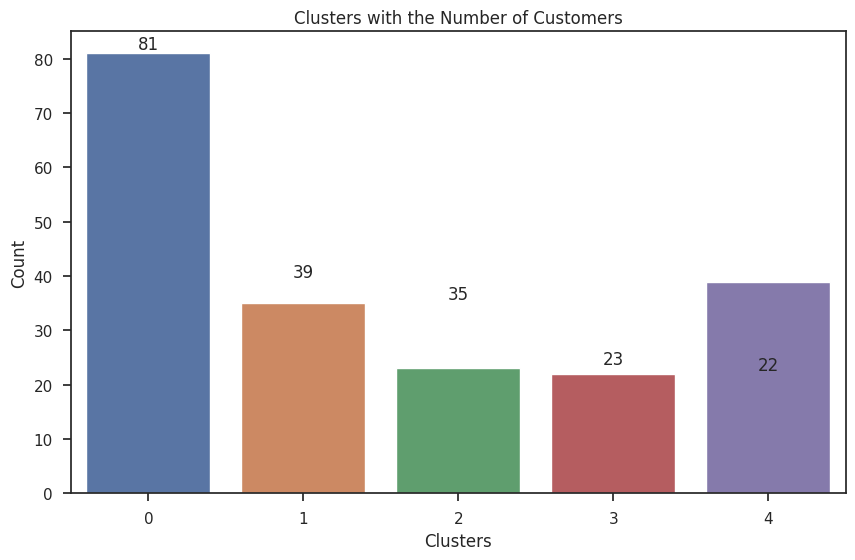

In [254]:
# Count the number of customers in each cluster
cluster_counts = df_ai_ss['cluster_Kmeans'].value_counts()

# Create a bar plot to visualize the cluster counts
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.title("Clusters with the Number of Customers")
plt.xlabel("Clusters")
plt.ylabel("Count")

# Add labels for each bar with the number of customers
for i, count in enumerate(cluster_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

In [255]:
df.head()

,Gender,Age,Annual_Income,Spending_Score,cluster_Age_Spending_Score
0,Male,19,15,39,3
1,Male,21,15,81,2
2,Female,20,16,6,1
3,Female,23,16,77,2
4,Female,31,17,40,3


In [256]:
df.drop(columns="cluster_Age_Spending_Score", inplace=True)

In [ ]:
df["cluster_Annual_Income_Spending_Score"] = df_ai_ss.cluster_Kmeans
df.head()
# Add cluster_Annual_Income_Spending_Score column.

In [ ]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster_Annual_Income_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

In [ ]:
df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean()

# here we group df by both Gender and cluster_Annual_Income_Spending_Score.

In [ ]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y="Age", x="cluster_Annual_Income_Spending_Score",
            hue= "Gender", data = df,palette="deep",saturation=0.5)
sns.swarmplot(y = "Age", x = "cluster_Annual_Income_Spending_Score",
              hue= "Gender", data = df,palette=sns.color_palette("Paired"))

plt.subplot(132)
sns.boxplot(y="Annual_Income", x="cluster_Annual_Income_Spending_Score",
            hue="Gender", data = df, palette="deep",saturation=0.5)
sns.swarmplot(y = "Annual_Income", x = "cluster_Annual_Income_Spending_Score",
              hue= "Gender", data = df,palette=sns.color_palette("Paired"))

plt.subplot(133)
sns.boxplot(y="Spending_Score", x="cluster_Annual_Income_Spending_Score",
            hue="Gender", data=df, palette="deep",saturation=0.5);
sns.swarmplot(y = "Spending_Score", x = "cluster_Annual_Income_Spending_Score",
              hue= "Gender", data = df,palette=sns.color_palette("Paired"))

In [ ]:
ax = df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean().plot(kind="bar",
                                                                                figsize=(20,6),
                                                                                fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)

## Conclusion

**Female**
#Cluster 0 (Female): The average age is around 41. Both annual income and spending scores are on average. It should be researched to find ways to encourage more spending in this group.

# Cluster 1 (Female): The average age is around 43. The annual income is very high, but the spending score is low. This group represents our target audience, and specific strategies should be developed to encourage spending.

# Cluster 2 (Female): The average age is around 43. Both annual income and spending scores are low. This group can be directed towards shopping with gift certificates.

# Cluster 3 (Female): The average age is around 25. While they have low annual incomes, they exhibit very high spending scores. This group does a lot of shopping, but they do not bring in as much profit.

# Cluster 4 (Female): The average age is around 32, and both the annual income and spending score are very high. This group consists of our loyal customers, and our company derives the main profit from this group. Special promotions should be considered to retain them. **bold text**


### Male

Cluster 0 (Male): The average age is around 45, and both annual income and spending scores are at an average level. Further research is needed to identify strategies that can encourage higher spending in this group.

Cluster 1 (Male): This cluster has an average age of around 39. While their annual income is very high, their spending scores are very low. This group represents our target audience, and it's crucial to develop special strategies to encourage spending.

Cluster 2 (Male): The average age in this cluster is approximately 48. Both annual income and spending scores are low. This group can be directed towards shopping with the use of gift certificates.

Cluster 3 (Male): With an average age of around 25, this cluster exhibits low annual incomes but very high spending scores. Despite their lower incomes, they engage in significant shopping. However, their overall contribution to profit is limited.

Cluster 4 (Male): The average age in this group is about 33, and both the annual income and spending score are very high. This cluster consists of our loyal customers, and our company derives the main profit from them. Consideration should be given to implementing very special promotions to retain this valuable segment.

In [ ]:
ax = df.groupby("cluster_Annual_Income_Spending_Score").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

Cluster 0: This group has an average age of around 43, and both annual income and spending scores are at moderate levels. Strategies should be explored to stimulate higher spending in this cluster.

Cluster 1: With an average age of about 41, this cluster stands out with very high annual income but exceptionally low spending scores. This segment represents our target audience, requiring the development of specialized strategies to promote spending.

Cluster 2: The average age in this cluster is approximately 45. Both annual income and spending scores are low. This group can be encouraged to shop with the use of gift certificates.

Cluster 3: With an average age of around 25, this cluster features low annual incomes but remarkably high spending scores. Despite their limited incomes, they engage in substantial shopping. However, their contribution to overall profit remains modest.

Cluster 4: This cluster comprises customers with an average age of about 33, displaying both very high annual income and spending scores. Our loyal customers are primarily found in this group, and our company derives the majority of its profits from them. Implementing highly targeted promotions is essential to retain this valuable segment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___